In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##Importing Libraries

In [5]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import os 
import cv2 
import tensorflow as tf 
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential,Model 
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout, GlobalAveragePooling2D, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import EarlyStopping, ReduceLROnPlateau,ModelCheckpoint

##Loading dataset

In [6]:
train_path = "/content/drive/MyDrive/Training"
test_path = "/content/drive/MyDrive/Testing"

img_size = 200

##Seperating Features and Labels

In [7]:
X = []
Y = []


for i in os.listdir(train_path):
    for j in os.listdir(train_path+"/"+i):
        img = cv2.imread(train_path+"/"+i+'/'+j)
        img = cv2.resize(img,(img_size,img_size))
        X.append(img) 
        Y.append(i)

In [8]:
Y = [0 if category == 'no_tumor' else(1 if category == 'glioma_tumor' else(2 if category=='meningioma_tumor' else 3)) for category in list(Y)]

In [9]:
X = (np.array(X))/255
Y = (np.array(Y))

##Split dataset into test and train

In [10]:
X_train,X_test,y_train,y_test = train_test_split(X,Y, test_size=0.2,random_state=42)

##callbacks

In [11]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
early_stop=EarlyStopping(patience=3)
reduceLR=ReduceLROnPlateau(patience=2)

##Build a model using vgg16

In [12]:
base_model = tf.keras.applications.VGG16(weights='imagenet', input_shape=(200, 200, 3), include_top=False)

for layer in base_model.layers:
    layer.trainable=False


In [13]:
x = base_model.output
x = Flatten()(x)
x = Dense(300, activation='relu')(x)
output = Dense(4, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=output)

##compile a model

In [14]:
model.compile(optimizer="adam",loss='sparse_categorical_crossentropy',metrics=['accuracy'])

##Train a model

In [15]:
vgg16 = model.fit(X_train,y_train,validation_data = (X_test,y_test),epochs =5,verbose = 1,batch_size = 16,callbacks =[reduceLR] )

Epoch 1/5
144/144 [==============================] - 42s 189ms/step - loss: 0.7867 - accuracy: 0.7365 - val_loss: 0.3804 - val_accuracy: 0.8415 - lr: 0.0010
Epoch 2/5
144/144 [==============================] - 21s 144ms/step - loss: 0.3162 - accuracy: 0.8802 - val_loss: 0.5825 - val_accuracy: 0.7648 - lr: 0.0010
Epoch 3/5
144/144 [==============================] - 21s 145ms/step - loss: 0.1745 - accuracy: 0.9307 - val_loss: 0.2303 - val_accuracy: 0.8990 - lr: 0.0010
Epoch 4/5
144/144 [==============================] - 21s 146ms/step - loss: 0.1319 - accuracy: 0.9564 - val_loss: 0.2401 - val_accuracy: 0.9094 - lr: 0.0010
Epoch 5/5
144/144 [==============================] - 21s 145ms/step - loss: 0.1260 - accuracy: 0.9551 - val_loss: 0.3039 - val_accuracy: 0.8937 - lr: 0.0010


##Ploting loss and accuracy graphs

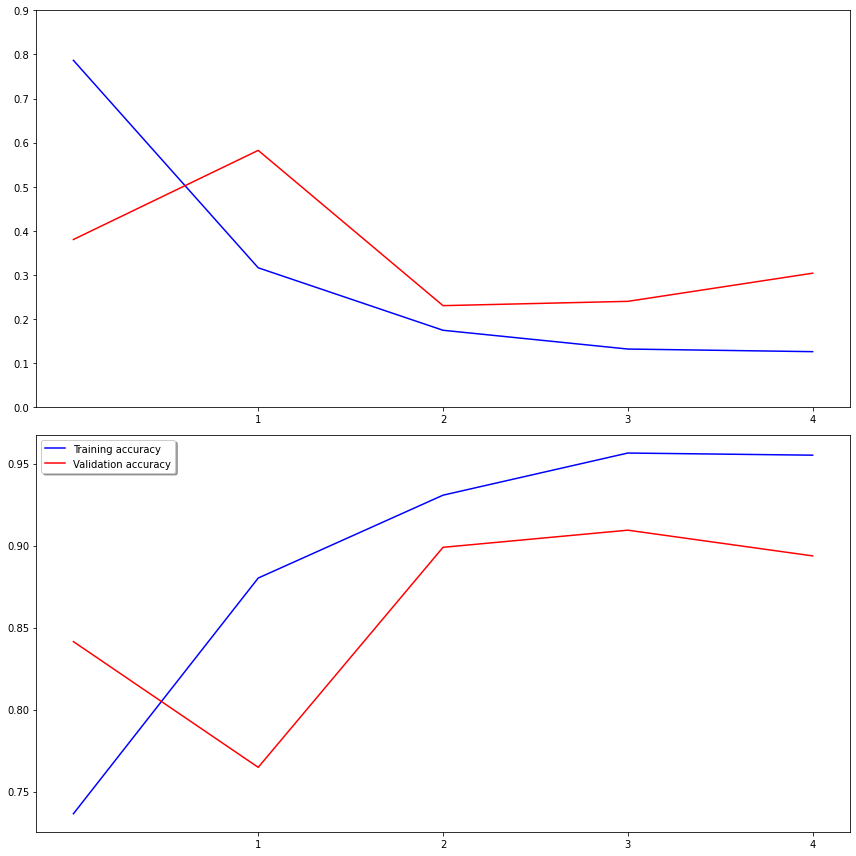

In [24]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))
ax1.plot(vgg16.history['loss'], color='b', label="Training loss")
ax1.plot(vgg16.history['val_loss'], color='r', label="validation loss")
ax1.set_xticks(np.arange(1, 5, 1))
ax1.set_yticks(np.arange(0, 1, 0.1))

ax2.plot(vgg16.history['accuracy'], color='b', label="Training accuracy")
ax2.plot(vgg16.history['val_accuracy'], color='r',label="Validation accuracy")
ax2.set_xticks(np.arange(1, 5, 1))

legend = plt.legend(loc='best', shadow=True)
plt.tight_layout()
plt.show()

##Build a model using vgg19

In [16]:
base_model = tf.keras.applications.VGG19(weights='imagenet', input_shape=(200, 200, 3), include_top=False)
for layer in base_model.layers:
    layer.trainable=False


In [17]:
x = base_model.output
x = Flatten()(x)
x = Dense(300, activation='relu')(x)
output = Dense(4, activation='softmax')(x)

model1 = Model(inputs=base_model.input, outputs=output)
model1.compile(optimizer="adam",loss='sparse_categorical_crossentropy',metrics=['accuracy'])

##Train a model

In [18]:
vgg19 = model1.fit(X_train,y_train,validation_data = (X_test,y_test),epochs =5,verbose = 1,batch_size = 16,callbacks =[reduceLR] )

Epoch 1/5
144/144 [==============================] - 27s 179ms/step - loss: 0.9684 - accuracy: 0.7239 - val_loss: 0.6190 - val_accuracy: 0.7456 - lr: 0.0010
Epoch 2/5
144/144 [==============================] - 25s 175ms/step - loss: 0.3470 - accuracy: 0.8624 - val_loss: 0.3088 - val_accuracy: 0.8763 - lr: 0.0010
Epoch 3/5
144/144 [==============================] - 25s 174ms/step - loss: 0.2192 - accuracy: 0.9151 - val_loss: 0.3084 - val_accuracy: 0.8728 - lr: 0.0010
Epoch 4/5
144/144 [==============================] - 25s 175ms/step - loss: 0.1757 - accuracy: 0.9312 - val_loss: 0.3517 - val_accuracy: 0.8624 - lr: 0.0010
Epoch 5/5
144/144 [==============================] - 25s 175ms/step - loss: 0.1471 - accuracy: 0.9499 - val_loss: 0.2512 - val_accuracy: 0.9077 - lr: 0.0010


##Ploting loss and accuracy graphs

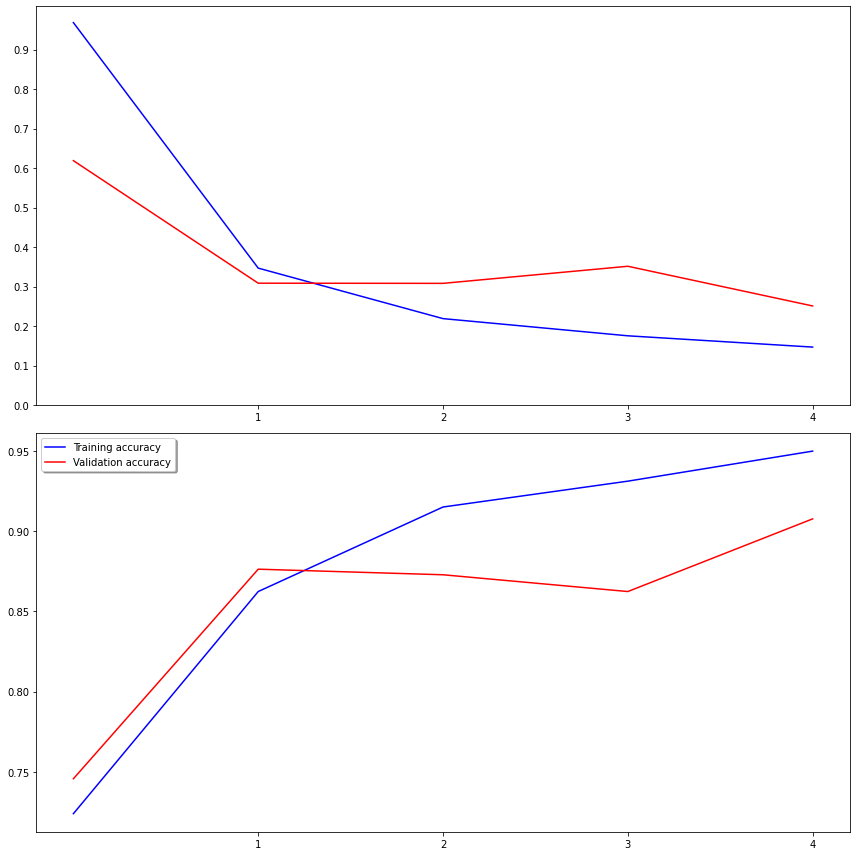

In [25]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))
ax1.plot(vgg19.history['loss'], color='b', label="Training loss")
ax1.plot(vgg19.history['val_loss'], color='r', label="validation loss")
ax1.set_xticks(np.arange(1, 5, 1))
ax1.set_yticks(np.arange(0, 1, 0.1))

ax2.plot(vgg19.history['accuracy'], color='b', label="Training accuracy")
ax2.plot(vgg19.history['val_accuracy'], color='r',label="Validation accuracy")
ax2.set_xticks(np.arange(1, 5, 1))

legend = plt.legend(loc='best', shadow=True)
plt.tight_layout()
plt.show()

##Build a model using resnet50

In [19]:
base_model = tf.keras.applications.resnet50.ResNet50(weights='imagenet', input_shape=(200, 200, 3), include_top=False)
for layer in base_model.layers:
    layer.trainable=False

94781440/94765736 [==============================] - 1s 0us/step


In [20]:
x = base_model.output
x = Flatten()(x)
x = Dense(300, activation='relu')(x)
output = Dense(4, activation='softmax')(x)

model2 = Model(inputs=base_model.input, outputs=output)
model2.compile(optimizer="adam",loss='sparse_categorical_crossentropy',metrics=['accuracy'])

##Train a model

In [21]:
resnet50 = model2.fit(X_train,y_train,validation_data = (X_test,y_test),epochs =5,verbose = 1,batch_size = 16,callbacks =[reduceLR] )

Epoch 1/5
144/144 [==============================] - 27s 158ms/step - loss: 3.4449 - accuracy: 0.4834 - val_loss: 1.6957 - val_accuracy: 0.5017 - lr: 0.0010
Epoch 2/5
144/144 [==============================] - 20s 138ms/step - loss: 1.4237 - accuracy: 0.5993 - val_loss: 1.6566 - val_accuracy: 0.5453 - lr: 0.0010
Epoch 3/5
144/144 [==============================] - 20s 139ms/step - loss: 0.9640 - accuracy: 0.6668 - val_loss: 0.8590 - val_accuracy: 0.7178 - lr: 0.0010
Epoch 4/5
144/144 [==============================] - 20s 139ms/step - loss: 0.8988 - accuracy: 0.6864 - val_loss: 0.8357 - val_accuracy: 0.7021 - lr: 0.0010
Epoch 5/5
144/144 [==============================] - 20s 139ms/step - loss: 0.7526 - accuracy: 0.7182 - val_loss: 0.6800 - val_accuracy: 0.7613 - lr: 0.0010


##Ploting loss and accuracy graphs

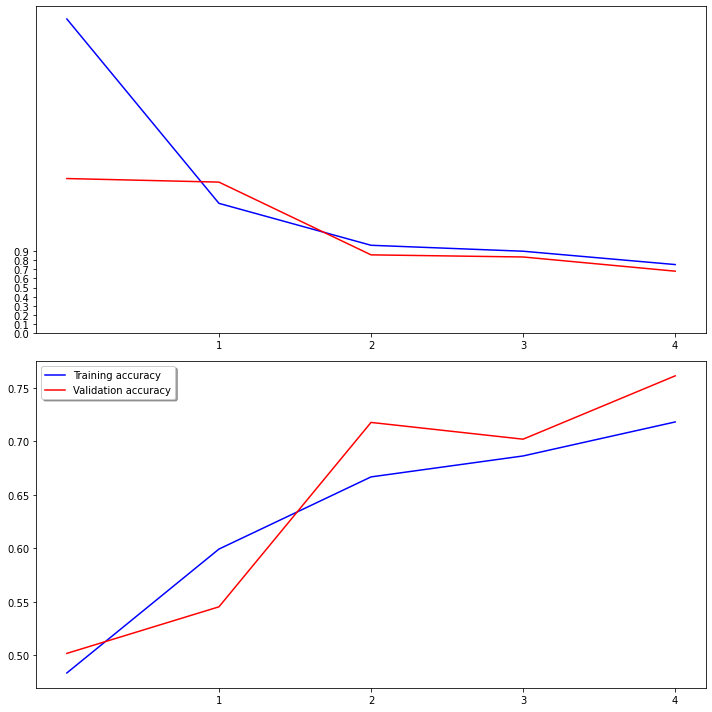

In [31]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10))
ax1.plot(resnet50.history['loss'], color='b', label="Training loss")
ax1.plot(resnet50.history['val_loss'], color='r', label="validation loss")
ax1.set_xticks(np.arange(1, 5, 1))
ax1.set_yticks(np.arange(0, 1, 0.1))



ax2.plot(resnet50.history['accuracy'], color='b', label="Training accuracy")
ax2.plot(resnet50.history['val_accuracy'], color='r',label="Validation accuracy")
ax2.set_xticks(np.arange(1, 5, 1))

legend = plt.legend(loc='best', shadow=True)
plt.tight_layout()
plt.show()

#vgg16 performed best with an accuracy of 90.94